In [5]:
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [9]:

server_url = "http://127.0.0.1:8001"  # Server endpoint
response = requests.get(f"{server_url}/get-global-parameters")
print(response.json())
global_model=response.json()
coef = np.array(global_model['coef']).flatten()  # Use flatten to convert 2D array to 1D if needed
intercept = global_model['intercept_']

node_file = "./Datasets/node8.csv"
data = pd.read_csv(node_file)

# Extract features (all columns except the 9th one)
local_dataset = data.drop(columns=data.columns[9]).values  # Drop the 9th column for features

# Extract labels (9th column)
y_test = data.iloc[:, 9].values  # Select the 9th column for labels

FLregressor = LinearRegression()

FLregressor.coef_ = coef.copy()
FLregressor.intercept_ = intercept

{'coef': [[0.0025662686335070576, -0.0025662686335070815, 0.00024563987124857103, -0.003165945225884955, -0.0103320406439166, 0.007765772010409448, -0.006387171157431144, 0.019116526883478303, -0.007242781737903399, 0.20070817580515557, -0.03301172475380904, 0.7464490598019576, 0.1367075530021851, 0.028826559881182507, -0.002466191638696029, 0.05604006225639443]], 'intercept_': -0.034066755661657094, 'time': '2025-03-24 20:37:00.798'}


In [10]:
y_pred= FLregressor.predict(local_dataset)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2) #With FL

0.9853763974062413


0.986933058577772

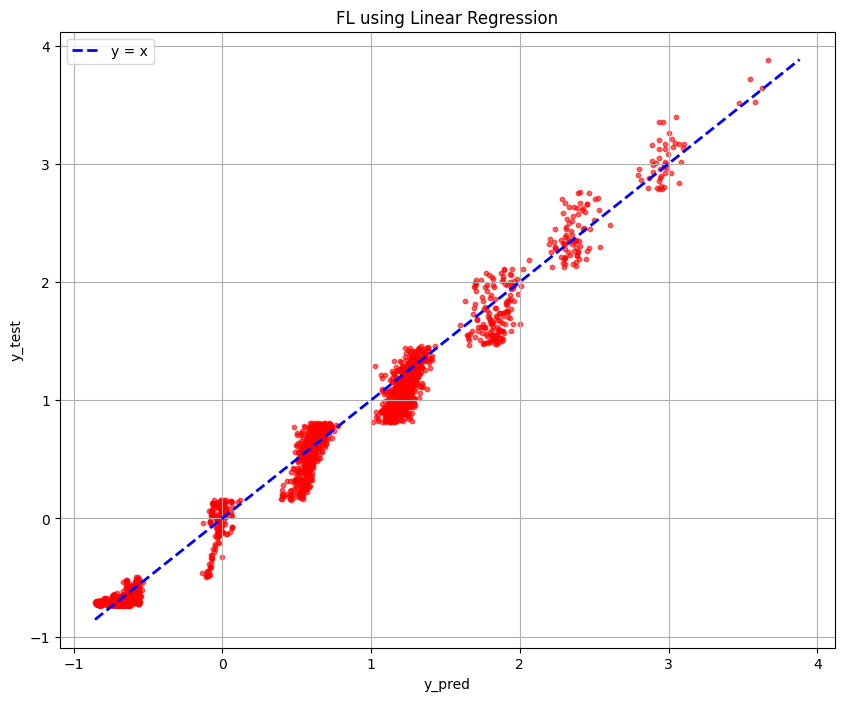

In [11]:
# Increase figure size for better readability
plt.figure(figsize=(10, 8))

# Scatter plot with smaller markers and added transparency
plt.scatter(y_pred, y_test, color='red', s=10, alpha=0.6)

# Plot y=x line with increased thickness for clarity
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', linewidth=2, label='y = x')

# Adding title and labels
plt.title("FL using Linear Regression")
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid for easier reading

# Show the plot
plt.show()